# 🚀 SISTEMA AVANZADO DE DETECCIÓN DE SHORTS

## Sistema Profesional con Análisis Inteligente

### ✨ Características Nuevas:
- **📊 35+ métricas técnicas** (antes: 10)
- **💡 Explicaciones del POR QUÉ** de cada señal
- **📑 Excel completo** con 5 hojas de análisis
- **🤖 Análisis con Claude AI** (opcional)
- **📈 Visualizaciones mejoradas**
- **🎯 Recomendaciones de trading** con risk/reward

### 📖 Cómo Usar:
1. Ejecuta las celdas en orden
2. Revisa la tabla de oportunidades
3. Descarga el Excel para análisis detallado
4. (Opcional) Usa Claude AI para segunda opinión

---

## 1️⃣ Instalación de Dependencias

In [4]:
# Ejecutar solo la primera vez
!pip install ccxt pandas ta matplotlib seaborn openpyxl anthropic nbformat ipywidgets -q
print('✅ Paquetes instalados')


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
✅ Paquetes instalados


## 2️⃣ Importar Módulo y Configurar

In [5]:
# Cargar el módulo avanzado
import sys
sys.path.append('.')
import short_detector_advanced as detector

# Imports adicionales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

print('✅ Módulo cargado y listo')

✅ Módulo cargado y listo


## 3️⃣ Configuración de Símbolos y Parámetros

In [6]:
# Símbolos a analizar (puedes agregar más)
SYMBOLS = [
    'BTC/USDT', 'ETH/USDT', 'BNB/USDT', 'XRP/USDT', 'ADA/USDT',
    'SOL/USDT', 'DOGE/USDT', 'MATIC/USDT', 'DOT/USDT', 'AVAX/USDT',
    'LINK/USDT', 'UNI/USDT', 'ATOM/USDT', 'LTC/USDT', 'ETC/USDT',
    'APT/USDT', 'ARB/USDT', 'OP/USDT', 'SUI/USDT', 'FIL/USDT'
]

# Score mínimo para considerar oportunidad
MIN_SCORE = 10

# API Key de Anthropic para análisis con IA (opcional)
ANTHROPIC_API_KEY = ''  # Coloca tu API key aquí

print(f'📊 Configurado para analizar {len(SYMBOLS)} símbolos')
print(f'🎯 Score mínimo: {MIN_SCORE}/35')
print(f'🤖 Claude AI: {"✅ Habilitado" if ANTHROPIC_API_KEY else "⚠️ Deshabilitado (agregar API key)"}')

📊 Configurado para analizar 20 símbolos
🎯 Score mínimo: 10/35
🤖 Claude AI: ⚠️ Deshabilitado (agregar API key)


## 4️⃣ Ejecutar Escaneo de Mercado

In [7]:
# EJECUTAR ANÁLISIS
all_results, opportunities = detector.scan_all_markets(SYMBOLS, min_score=MIN_SCORE)

# Mostrar resumen por niveles
print('\n' + '='*100)
print('📊 RESUMEN POR NIVELES DE CONFIANZA:')
print('='*100)

levels = [
    (25, '🔥 EXTREMA'),
    (20, '🔴 MUY ALTA'),
    (15, '🟠 ALTA'),
    (10, '🟡 MEDIA'),
    (5, '🟢 BAJA')
]

for min_score, label in levels:
    count = len([r for r in all_results if r['score'] >= min_score])
    print(f'{label:20s} (>={min_score:2d} pts): {count:3d} oportunidades')

if not opportunities:
    print('\n⚠️ No se encontraron oportunidades con el score mínimo.')
    print(f'💡 Intenta reducir MIN_SCORE a {max(5, all_results[0]["score"]-2) if all_results else 5}')

🔍 Escaneando 20 criptomonedas...
✅ 1/20 - BTC/USDT: 10/35 ⭐
✅ 2/20 - ETH/USDT: 12/35 ⭐
⚪ 3/20 - BNB/USDT: 8/35
⚪ 4/20 - XRP/USDT: 8/35
⚪ 5/20 - ADA/USDT: 8/35
✅ 6/20 - SOL/USDT: 12/35 ⭐
✅ 7/20 - DOGE/USDT: 11/35 ⭐
❌ Error MATIC/USDT: binance does not have market symbol MATIC/USDT
⚪ 9/20 - DOT/USDT: 7/35
⚪ 10/20 - AVAX/USDT: 7/35
⚪ 11/20 - LINK/USDT: 8/35
⚪ 12/20 - UNI/USDT: 3/35
⚪ 13/20 - ATOM/USDT: 7/35
⚪ 14/20 - LTC/USDT: 8/35
⚪ 15/20 - ETC/USDT: 6/35
✅ 16/20 - APT/USDT: 12/35 ⭐
⚪ 17/20 - ARB/USDT: 7/35
⚪ 18/20 - OP/USDT: 8/35
⚪ 19/20 - SUI/USDT: 8/35
⚪ 20/20 - FIL/USDT: 9/35

🎯 Encontradas 5 oportunidades (score >= 10)

📊 RESUMEN POR NIVELES DE CONFIANZA:
🔥 EXTREMA            (>=25 pts):   0 oportunidades
🔴 MUY ALTA           (>=20 pts):   0 oportunidades
🟠 ALTA               (>=15 pts):   0 oportunidades
🟡 MEDIA              (>=10 pts):   5 oportunidades
🟢 BAJA               (>= 5 pts):  18 oportunidades


## 5️⃣ Tabla de Oportunidades

In [8]:
if opportunities:
    print('\n🎯 TOP OPORTUNIDADES DE SHORT')
    print('='*100)
    
    # Crear tabla resumen
    data = []
    for opp in opportunities[:15]:  # Top 15
        data.append({
            'Symbol': opp['symbol'],
            'Score': f"{opp['score']}/{opp['max_score']}",
            'Precio': f"${opp['price']:.4f}",
            'RSI': f"{opp['details'].get('rsi', 0):.1f}",
            'MACD': opp['details'].get('macd_signal', '-'),
            'EMAs Bajo': opp['details'].get('below_emas', '-'),
            'Volumen': f"{opp['details'].get('volume_ratio', 0):.2f}x",
            'Funding': f"{opp['details'].get('funding_rate', 0):.3f}%",
            'Señales': len(opp['signals']),
            'Confianza': '⭐⭐⭐⭐⭐' if opp['score'] >= 25 else '⭐⭐⭐⭐' if opp['score'] >= 20 else '⭐⭐⭐'
        })
    
    df_opp = pd.DataFrame(data)
    display(df_opp)
else:
    print('⚠️ No hay oportunidades para mostrar')


🎯 TOP OPORTUNIDADES DE SHORT


,Symbol,Score,Precio,RSI,MACD,EMAs Bajo,Volumen,Funding,Señales,Confianza
0,ETH/USDT,12/35,$1919.9900,29.8,Bajista,5/5,0.36x,-0.012%,4,⭐⭐⭐
1,SOL/USDT,12/35,$78.8500,27.9,Bajista,5/5,0.70x,-0.013%,4,⭐⭐⭐
2,APT/USDT,12/35,$0.9289,23.1,Bajista,5/5,0.23x,-0.018%,4,⭐⭐⭐
3,DOGE/USDT,11/35,$0.0896,35.0,Bajista,5/5,0.36x,-0.004%,4,⭐⭐⭐
4,BTC/USDT,10/35,$66332.1000,35.8,Bajista,5/5,0.30x,0.001%,3,⭐⭐⭐


## 6️⃣ Detalles de las Top 3 Oportunidades

In [9]:
if opportunities:
    print('\n📋 ANÁLISIS DETALLADO - TOP 3 OPORTUNIDADES')
    print('='*100)
    
    for i, opp in enumerate(opportunities[:3], 1):
        print(f'\n{"="*100}')
        print(f'{i}. {opp["symbol"]} - Score: {opp["score"]}/{opp["max_score"]} {"⭐"*min(5, opp["score"]//5)}')
        print(f'{"="*100}')
        
        print(f'\n💰 PRECIO: ${opp["price"]:.6f}')
        
        print(f'\n🎯 SEÑALES DETECTADAS ({len(opp["signals"])}):')
        for signal in opp['signals']:
            print(f'   • {signal}')
        
        if opp['explanations']:
            print(f'\n💡 EXPLICACIONES DETALLADAS ({len(opp["explanations"])}):')
            print(f'{"-"*100}')
            for exp in opp['explanations']:
                print(f"\n📊 {exp['indicador']} = {exp['valor']} ({exp['puntos']} puntos)")
                print(f"   ❓ POR QUÉ: {exp['por_que']}")
                print(f"   📌 QUÉ SIGNIFICA: {exp['que_significa']}")
                print(f"   🎯 Confianza: {exp['confianza']}")
        
        # Cálculo de targets
        price = opp['price']
        stop_loss = price * 1.03
        t1 = opp['details'].get('target_1_ema20', price * 0.97)
        t2 = opp['details'].get('target_2_ema50', price * 0.94)
        t3 = opp['details'].get('target_3_ema200', price * 0.90)
        
        print(f'\n📈 PLAN DE TRADING:')
        print(f'   🔹 Entrada:    ${price:.4f}')
        print(f'   🛑 Stop-Loss:  ${stop_loss:.4f} (+3.0%)')
        print(f'   🎯 Target 1:   ${t1:.4f} ({((price-t1)/price*100):.1f}%) [EMA 20]')
        print(f'   🎯 Target 2:   ${t2:.4f} ({((price-t2)/price*100):.1f}%) [EMA 50]')
        print(f'   🎯 Target 3:   ${t3:.4f} ({((price-t3)/price*100):.1f}%) [EMA 200]')
        
        rr = (price - t2) / (stop_loss - price)
        print(f'\n   📊 Risk/Reward (T2): {rr:.2f}:1')
        
        # Tamaño de posición para $10,000
        capital = 10000
        risk_pct = 0.01
        risk_amount = capital * risk_pct
        pos_size = risk_amount / 0.03
        
        print(f'\n💼 GESTIÓN DE RIESGO (Capital $10,000):')
        print(f'   • Riesgo: 1% = ${risk_amount:.2f}')
        print(f'   • Tamaño posición: ${pos_size:.2f}')
        print(f'   • Si gana (T2): ${((price-t2)/price*pos_size):.2f}')
        print(f'   • Si pierde: ${risk_amount:.2f}')
        
        print(f'\n{"-"*100}')


📋 ANÁLISIS DETALLADO - TOP 3 OPORTUNIDADES

1. ETH/USDT - Score: 12/35 ⭐⭐

💰 PRECIO: $1919.990000

🎯 SEÑALES DETECTADAS (4):
   • 🟡 MACD zona bajista
   • 🔴 Precio bajo 5/5 EMAs
   • 🔴 Tendencia bajista fuerte (ADX 31)
   • 💰 Funding muy negativo: -0.012%

💡 EXPLICACIONES DETALLADAS (3):
----------------------------------------------------------------------------------------------------

📊 EMAs = 5/5 (5 puntos)
   ❓ POR QUÉ: Precio por debajo de 5 medias móviles. Todas actúan como resistencias.
   📌 QUÉ SIGNIFICA: Tendencia bajista confirmada en múltiples timeframes. Alta presión vendedora estructural.
   🎯 Confianza: ⭐⭐⭐⭐⭐

📊 ADX = 31.4 (3 puntos)
   ❓ POR QUÉ: ADX 31 (>25) con DI- > DI+ confirma tendencia bajista fuerte.
   📌 QUÉ SIGNIFICA: No es movimiento lateral. Hay momentum bajista claro y sostenido.
   🎯 Confianza: ⭐⭐⭐

📊 Funding Rate = -0.012% (2 puntos)
   ❓ POR QUÉ: Funding rate -0.012% (muy negativo). Holders de shorts reciben pago.
   📌 QUÉ SIGNIFICA: Mayoría del mercado 

## 7️⃣ Generar Excel Completo

In [10]:
if opportunities:
    # Generar Excel con análisis completo
    excel_file = detector.generate_excel_report(all_results, opportunities)
    
    print(f'\n📊 CONTENIDO DEL EXCEL:')
    print(f'   1. Resumen Ejecutivo - Top 10 oportunidades')
    print(f'   2-6. Análisis Detallado - Top 5 con explicaciones completas')
    print(f'   7. Recomendaciones de Trading - Precios, stops, targets')
    print(f'   8. Estadísticas Generales - Métricas del escaneo')
    
    print(f'\n✅ Archivo listo para descargar: {excel_file}')
else:
    print('⚠️ No hay oportunidades para generar Excel')

✅ Excel generado: analisis_shorts_20260211_181634.xlsx

📊 CONTENIDO DEL EXCEL:
   1. Resumen Ejecutivo - Top 10 oportunidades
   2-6. Análisis Detallado - Top 5 con explicaciones completas
   7. Recomendaciones de Trading - Precios, stops, targets
   8. Estadísticas Generales - Métricas del escaneo

✅ Archivo listo para descargar: analisis_shorts_20260211_181634.xlsx


## 8️⃣ (Opcional) Análisis con Claude AI

In [11]:
# Solo si tienes API key de Anthropic
if ANTHROPIC_API_KEY and opportunities:
    print('🤖 ANÁLISIS CON CLAUDE AI')
    print('='*100)
    
    # Analizar la mejor oportunidad
    best = opportunities[0]
    print(f'\nAnalizando: {best["symbol"]}...')
    
    result = detector.analyze_with_claude(best, ANTHROPIC_API_KEY)
    
    if result['success']:
        print(f'\n{result["analysis"]}')
    else:
        print(f'\n❌ Error: {result["error"]}')
        
elif not ANTHROPIC_API_KEY:
    print('⚠️ Configura ANTHROPIC_API_KEY en la celda 3 para usar Claude AI')
else:
    print('⚠️ No hay oportunidades para analizar')

⚠️ Configura ANTHROPIC_API_KEY en la celda 3 para usar Claude AI


## 9️⃣ Visualizaciones

NameError: name 'np' is not defined

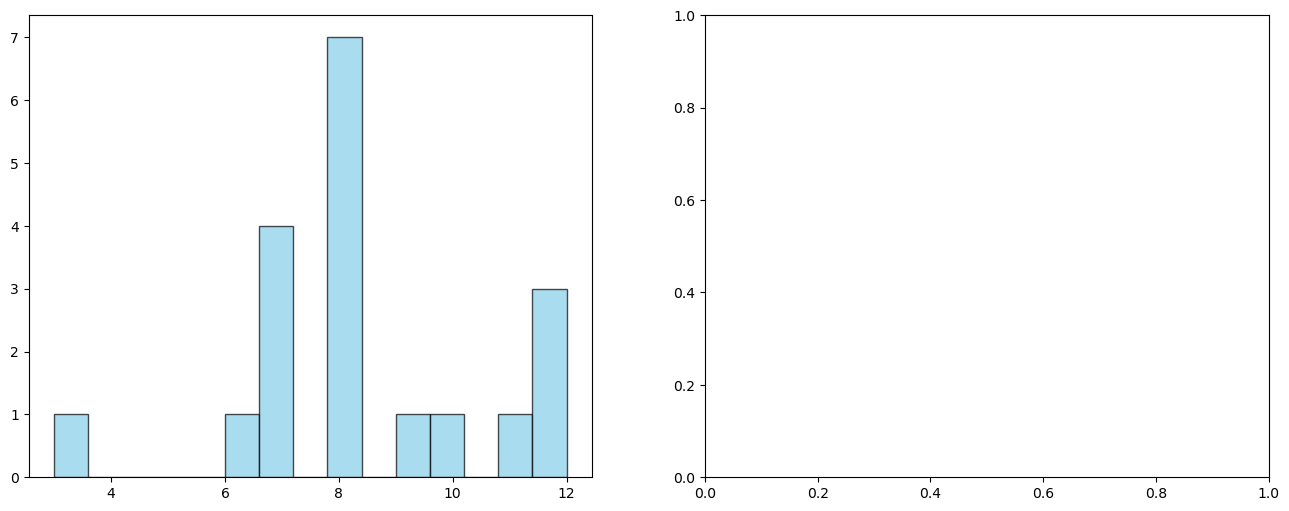

In [12]:
if all_results:
    scores = [r['score'] for r in all_results]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histograma
    ax1.hist(scores, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    ax1.axvline(np.mean(scores), color='red', linestyle='--', linewidth=2, 
                label=f'Media: {np.mean(scores):.1f}')
    ax1.set_xlabel('Score')
    ax1.set_ylabel('Cantidad')
    ax1.set_title('Distribución de Scores')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # Top 10
    top10 = all_results[:10]
    symbols = [r['symbol'].replace('/USDT', '') for r in top10]
    scores10 = [r['score'] for r in top10]
    
    colors = ['darkred' if s >= 25 else 'orange' if s >= 20 else 'yellow' if s >= 15 else 'lightblue' 
              for s in scores10]
    ax2.barh(symbols, scores10, color=colors)
    ax2.set_xlabel('Score')
    ax2.set_title('Top 10 Oportunidades')
    ax2.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas
    print(f'\n📊 ESTADÍSTICAS:')
    print(f'   Score Máximo:   {max(scores)}/35')
    print(f'   Score Promedio: {np.mean(scores):.1f}/35')
    print(f'   Score Mediano:  {np.median(scores):.1f}/35')
    print(f'   Oportunidades score > 20: {len([s for s in scores if s >= 20])}')
else:
    print('⚠️ No hay datos para visualizar')

## 📚 Interpretación de Resultados

### Niveles de Confianza:
- **25-35 puntos** 🔥 = Extrema confianza - Oportunidad excepcional
- **20-24 puntos** 🔴 = Muy alta - Muy buena oportunidad
- **15-19 puntos** 🟠 = Alta - Buena oportunidad
- **10-14 puntos** 🟡 = Media - Oportunidad moderada
- **< 10 puntos** 🟢 = Baja - Esperar mejores señales

### Cómo Usar las Explicaciones:
Cada indicador muestra:
- **POR QUÉ**: La razón técnica de la señal
- **QUÉ SIGNIFICA**: Implicación práctica para el trading
- **Confianza**: Fiabilidad histórica del indicador

### Gestión de Riesgo:
- Siempre usar stop-loss (recomendado: 3% arriba)
- Arriesgar solo 1-2% del capital por operación
- Confirmar señales en timeframes superiores (4h, 1d)
- Revisar el Excel para análisis completo

---